# Univariate and Bivariate Analysis Lab

This data was created <b>based on the following dataset</b>: https://www.kaggle.com/mustafaali96/weight-height

The variables used are:
* Money
* Height
* Weight
* Gender


## Context

We'll use the weight-height dataset to have a deeper understanding of some important variable distributions.

We'll understand how to:
- have a glance on the statistics distribution just by observing the main statistical numerical description of our dataset.
- understand the effect of a normal and non-normal distribution on our outlier analysis
- understand how one variable can impact on another variable distribution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import libraries 

## Read dataset from `weight-height-money.csv`.

Take a look at the first rows of the dataset.

In [4]:
df = pd.read_csv('/Users/alessandra/Documents/Ironhack/Curso/Data/weight-height-money.csv')

In [8]:
df.head(10)

,Gender,Height,Weight,Money
0,Male,73.847017,241.893563,21.462754
1,Male,68.781904,162.310473,94.732358
2,Male,74.110105,212.740856,130.077362
3,Male,71.730978,220.042470,214.096064
4,Male,69.881796,206.349801,765.091245
5,Male,67.253016,152.212156,694.157013
6,Male,68.785081,183.927889,29.682574
7,Male,68.348516,167.971110,1482.317658
8,Male,67.018950,175.929440,735.713608
9,Male,63.456494,156.399676,91.625816


## Use the describe method to understand the data.

In [6]:
df.describe()

,Height,Weight,Money
count,10000.000000,10000.000000,1.000000e+04
mean,66.367560,161.440357,6.311565e+02
std,3.847528,32.108439,8.060481e+02
min,54.263133,64.700127,1.735664e-07
25%,63.505620,135.818051,8.906720e+01
50%,66.318070,161.212928,3.390872e+02
75%,69.174262,187.169525,8.515404e+02
max,78.998742,269.989699,8.168216e+03


In [11]:
df.describe().T[['mean', '50%']]

,mean,50%
Height,66.367560,66.318070
Weight,161.440357,161.212928
Money,631.156464,339.087164


## What can you observe? Compare mean and median values for each variable of our dataset.

**Answer: We can see that Height and Weight have the same mean and median, behaving as a normal distribution. On the other hand, the variable money does not have the same mean and median, behaving as a paranormal distribution.**

## From that observation, what can you conclude? Can you imagine which kind of distribution each one has?

Try to predict which category each variable most likely seems to fall into (without plotting it yet):
- Left skewed
- Right skewed
- Gaussian-like

_hint: Remember the effect of outliers on the mean and median values_

In [12]:
df.describe()

,Height,Weight,Money
count,10000.000000,10000.000000,1.000000e+04
mean,66.367560,161.440357,6.311565e+02
std,3.847528,32.108439,8.060481e+02
min,54.263133,64.700127,1.735664e-07
25%,63.505620,135.818051,8.906720e+01
50%,66.318070,161.212928,3.390872e+02
75%,69.174262,187.169525,8.515404e+02
max,78.998742,269.989699,8.168216e+03


**Answer: First, the variable Height has the distance of point minimum and maximum not very large, the median and mean are about the same and the standard deviation is little --> Gaussian-like.
Second, the variable Weight has a bigger distance between minimum and maximum and also bigger value of standard deviation, but the mean and median are about the same, so we could imagine that most of the data is concentrated in a region within the mean -->  Gaussian-like.
Third, the variable Money has the median and mean distant from each other, so we can suppose that some observations are pulling the mean closer to them and there is more concentration in the left side, as we can see that we have a less distance between the minimum and median --> Left skewed.**

Usually, the comparison between mean and median already leads us to meaningful insights regarding the variable's distribution. If mean and median are close, you can suppose that most of the data is concentrated in a region within the mean. However, if median and mean are far apart, you can suppose that some observations are pulling the mean closer to them.

# Univariate Analysis

## Gender count

Count how many Male and Female exist on this dataset using pandas. 

In [13]:
df['Gender'].value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

## Visual gender count

Use seaborn (sns) to visually see how many male and female exist on the dataset.

_hint: If you don't know how to do this, you can google: seaborn + the pandas method you used on the previous exercise_

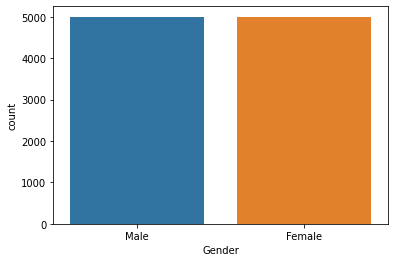

In [14]:
sns.countplot(x = 'Gender', data=df)

## Consider only Height

Create a pandas series of the Height variable

In [16]:
height = df['Height']
height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

### Histogram-plot

Plot the histogram of the height

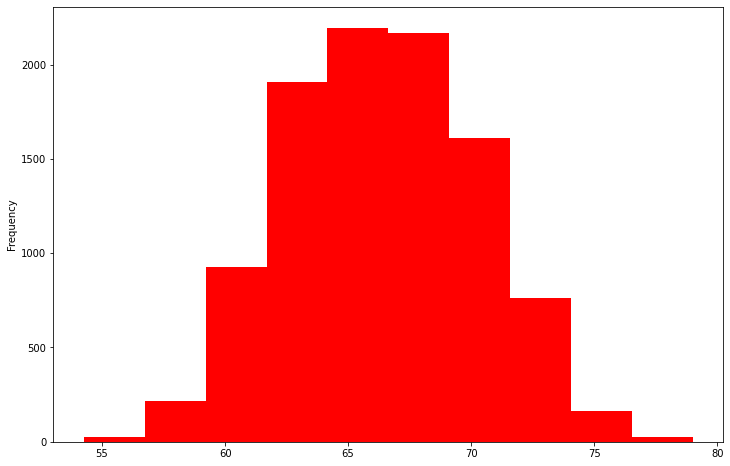

In [18]:
plt.figure(figsize=(12, 8))
height.plot(kind = 'hist', color = 'red')

### Box-plot

Plot the boxplot of the height

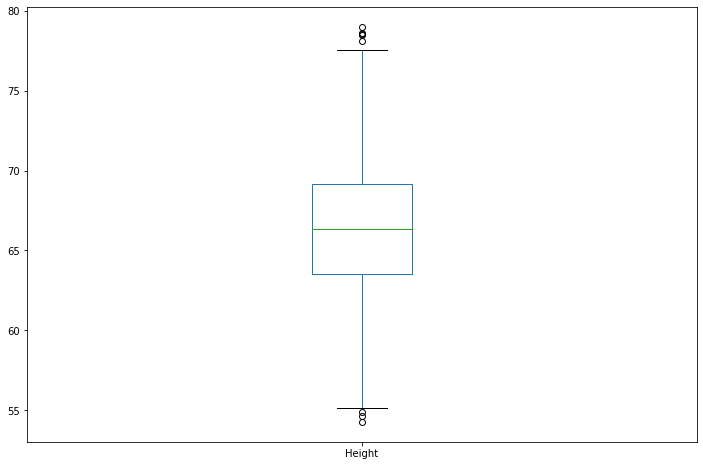

In [19]:
plt.figure(figsize=(12, 8))
height.plot(kind = 'box')

What do you think the distribution of height is like? Do you think it is common for variables to behave like that in real life?

**Answer: This distribution seems to be Gaussian-like and I think could be common to find variables like that, for example, if we select a population that belongs to the same country, we could find similarities.**

### KDE distribution for height

Plot the kde (kernel-density-estimation) distribution (without the hist distribution) of the height.

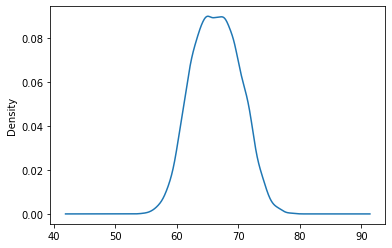

In [20]:
height.plot(kind = 'kde')

### Analysis

As we can see we have a high count for height in the range near 60 to 75. How many people fall off 3 standard deviations from the mean? Can you consider them outliers? Why is that?

#### Calculate the mean

In [25]:
mean = df['Height'].mean()

#### Calculate the standard deviation 

In [26]:
std = df['Height'].std()

#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

In [29]:
upper_cutoff = mean + 3 * std
upper_cutoff

77.91014411714093

In [30]:
lower_cutoff = mean - 3 * std
lower_cutoff

54.82497539250156

#### Now filter the original dataset. 

Use the values you calculated above to filter the original dataset. 

You should obtain a filtered dataset containing only the rows in which the `Height` column is greater than the upper cutoff and lower than the lower cutoff.

In [41]:
df2 = df.loc[(df['Height'] > upper_cutoff) | (df['Height'] < lower_cutoff)]
df2

,Gender,Height,Weight,Money
994,Male,78.095867,255.690835,1357.105000
1317,Male,78.462053,227.342565,5.457968
2014,Male,78.998742,269.989699,131.474470
3285,Male,78.528210,253.889004,0.089663
3757,Male,78.621374,245.733783,204.113245
6624,Female,54.616858,71.393749,226.061310
9285,Female,54.263133,64.700127,646.532185


#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value? Why?

In [58]:
height.shape

(10000,)

In [60]:
 df2.shape

(7, 4)

In [77]:
(df2.shape[0]/df['Height'].shape[0])*100

0.06999999999999999

## Now perform the same analysis for `money` variable.

You'll do exactly the same analysis for a variable of your dataset that has some different aspects. Let's try to understand that.

### Considering only money

Generate a variable called money from the dataset

In [64]:
# your code here
money = df['Money']
money

0         21.462754
1         94.732358
2        130.077362
3        214.096064
4        765.091245
           ...     
9995     240.933121
9996    1220.781276
9997       0.258369
9998    1552.920529
9999    2232.337002
Name: Money, Length: 10000, dtype: float64

In [65]:
money.shape

(10000,)

### Histogram-plot

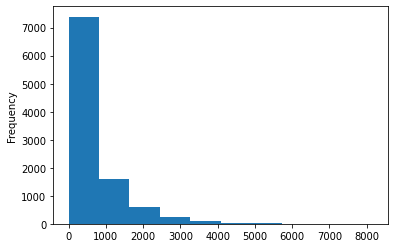

In [66]:
money.plot(kind='hist')

### Box-plot

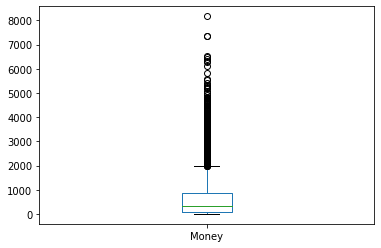

In [68]:
money.plot(kind='box')

### KDE distribution for height

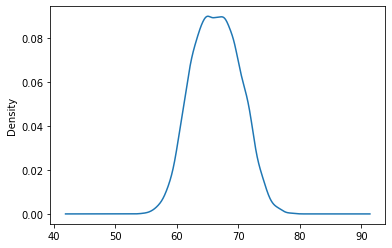

In [69]:
height.plot(kind = 'kde')

### Analysis

Again, how many people fall off 3 standard deviations in both cases (which percentage of the dataset)? Let's do it by parts:

#### Calculate the mean

In [71]:
mean = df['Money'].mean()
mean

631.1564641555967

#### Calculate the standard deviation 

In [72]:
std = df['Money'].std()
std

806.048057311861

#### Calculate the values for the cutoffs:

`upper_cutoff = mean` <b><span style="color:red">+</span></b> `3 * standard_deviation` 

`lower_cutoff = mean` <b><span style="color:red">-</span></b> `3 * standard_deviation`

In [73]:
upper_cutoff = mean + 3 * std
upper_cutoff

3049.3006360911795

In [74]:
lower_cutoff = mean - 3 * std
lower_cutoff

-1786.9877077799863

#### Again, filter the original dataset. 

In [75]:
df3 = df.loc[(df['Money'] > upper_cutoff) | (df['Money'] < lower_cutoff)]
df3

,Gender,Height,Weight,Money
234,Male,67.369809,176.636164,3725.078083
294,Male,64.425194,169.109401,3942.967034
355,Male,72.938649,216.097455,3762.418909
518,Male,68.346457,178.675992,3286.659362
662,Male,69.430998,172.325881,3798.711723
...,...,...,...,...
9873,Female,63.707174,132.760922,3164.374960
9888,Female,65.105932,149.694693,3929.572877
9922,Female,58.752489,106.846041,3541.679543
9930,Female,68.544449,148.828165,3916.316217


#### Finally, calculate the shape of this filtered dataset and compare with the original dataframe.

Which percentage felt in these thresholds? Did you expect this value?

In [76]:
(df3.shape[0]/df['Money'].shape[0])*100

2.29

Can you consider them outliers?

**Answer: The variable 'Money' does not behave as a normal distribution, because of that, we couldn't consider this percentage as outliers.**

By now, you should have observed that in order to consider an observation an `outlier`, one needs to take into account the **distribution** of the variable. In fact, most statistical aspects do not mean anything until you understand the variable's distribution.

# Bivariate Analysis

## Considering both height and weight

Now we'll consider both height and weight variables to understand our data. We'll perform what is called a bivariate analysis.

### Perform a scatterplot to check the relation between Height and Weight

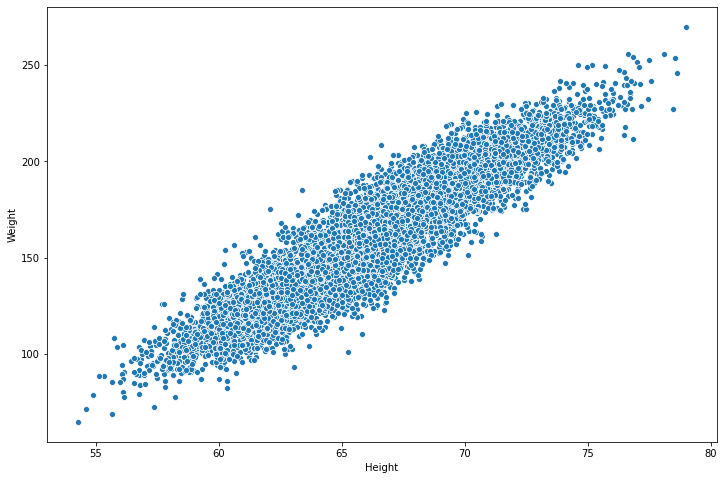

In [78]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'Height' , y = 'Weight')

### Do the same plot, but color the markers by Gender

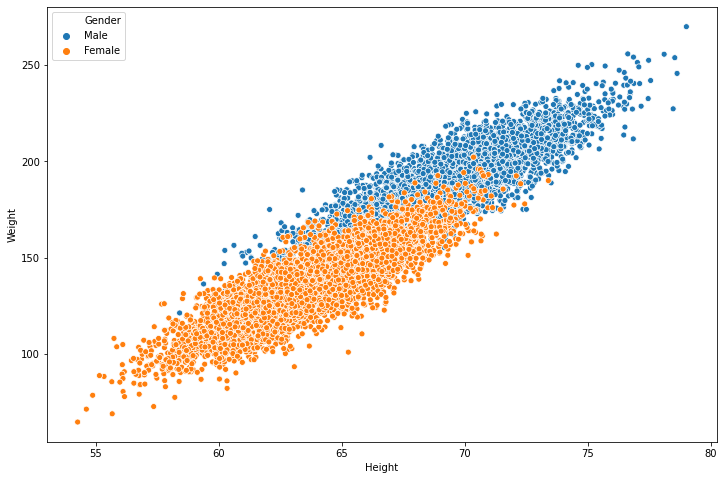

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'Height' , y = 'Weight', hue = 'Gender')

### Which insights hue'ing the plot using the variable Gender has brought to you? 

**Answer: The population of male has a higher 'Height' and 'Weight' than female.**

### Create a variable called `gender_groupby` to group data by 'Gender'. However, don't define any aggregations yet. 

Just perform the groupby operation.

In [85]:
gender_groupby = df.groupby('Gender')

#### Run `gender_groupby.head()` to check the groups obtained.

In [86]:
gender_groupby.head()

,Gender,Height,Weight,Money
0,Male,73.847017,241.893563,21.462754
1,Male,68.781904,162.310473,94.732358
2,Male,74.110105,212.740856,130.077362
3,Male,71.730978,220.042470,214.096064
4,Male,69.881796,206.349801,765.091245
5000,Female,58.910732,102.088326,25.530452
5001,Female,65.230013,141.305823,270.612186
5002,Female,63.369004,131.041403,1114.256936
5003,Female,64.479997,128.171511,2194.127692
5004,Female,61.793096,129.781407,462.814462


#### Run gender_groupby.describe() to check the statistics for each group. 

_hint: You can transpose this result to obtain a better visualization of the results_


In [87]:
gender_groupby.describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight              ...                          \
              75%        max   count        mean  ...         75%         max   
Gender                                            ...                           
Female  65.563565  73.389586  5000.0  135.860093  ...  148.810926  202.237214   
Male    70.988744  78.998742  5000.0  187.020621  ...  200.357802  269.989699   

         Money                                                                \
         count        mean         std           min         25%         50%   
Gender                                                                         
Female  5000.0  751.959852  860.718215  4.194596e-03  162.499271  453.032412   
Male    5000.0  510.353076  727.686958  1.735664e-07   48.648924  232.012273   

                                  
                75%          max  
Gender                            
Female  1015.017353  7347.139257  
Male     667.073116  8168.216190  

[2 rows x 24 columns]

The results above should give you some insights of the effect of gender on your dataset both visually and numerically.

**Answer: The female mean 'Height' is near by the male one. In the variable 'Weight', the mean has a larger distance between male and female. Finally, if we compare this statistic in the variable 'Money', the female is much bigger than male.**

## Distribution plots

### Verifying the distribution of your variables for each Gender.

We have seen that each variable in our dataset has its own "DNA". This is the distribution of each variable. However, the story does not stop there. Each variable has peculiarities within it and it is our job as data analyst to discover it. We'll see futurely that what `machine learning models` mostly do for us is automate this process (if we understand them, of course) 

In this case, specifically, we want to understand the effect of our `Gender` variable on the distribution of our dataset.


### First, plot the distribution of the `Height` variable again.

Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

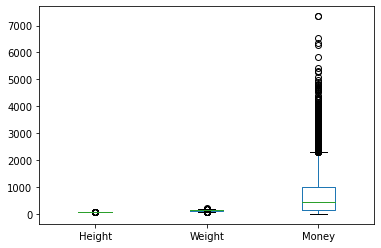

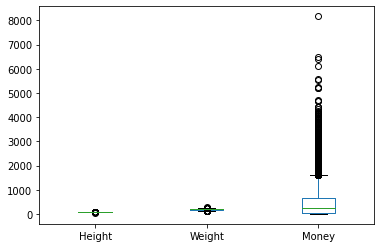

In [93]:
gender_groupby.plot(kind = 'box')

### Now, filter your dataset for each gender. Create a dataframe called `men` and another called `women` and plot the `Height` distribution for each of them in the same plot.

In [94]:
men = df.loc[(df['Gender'] == 'Male')]
women = df.loc[(df['Gender'] == 'Female')]

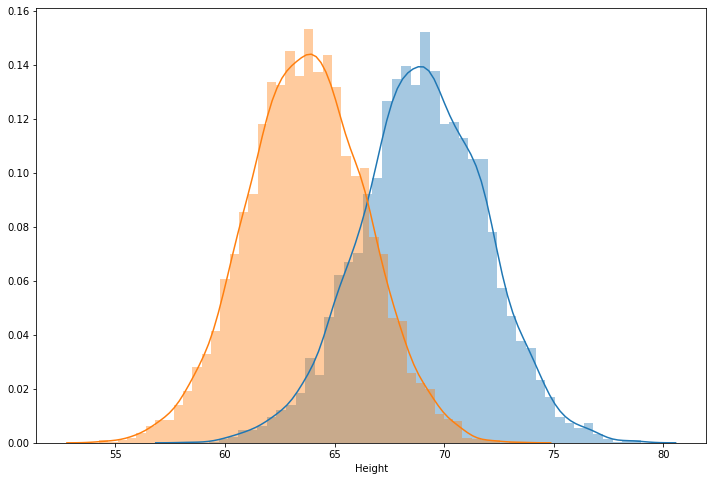

In [96]:
plt.figure(figsize=(12,8))
sns.distplot(men['Height'], label='men')
sns.distplot(women['Height'], label='women')

### What insights could you observe from that? What is the impact of `Gender` on `Height`

**Answer: We can observe that we have values in common between the two variables, but we can see the concentration of female is in a smaller range height than male. So, the gender influences the height variation.**

**Extra Note:** The issue: https://github.com/mwaskom/seaborn/issues/861 has a discussion of why distplot doesn't have a `hue` argument and how to overcome it (look for FacetGrid)

Try to do the same for the `Money` variable. What is the impact of `Gender` on `Money` ?

_Hint: for the Money variable, try specifying `hist=False`_


## Boxplot 

### Gender vs Height

Plot the boxplot considering the x-axis as `Gender` and y-axis as `Height`

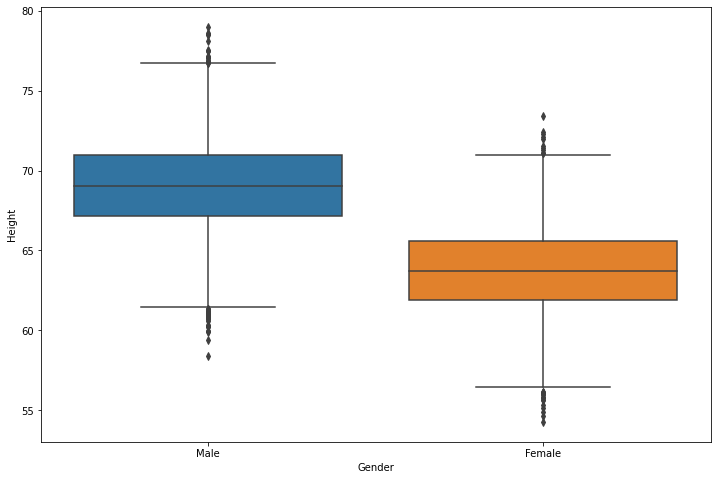

In [97]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Gender', y = 'Height', data = df)

### Gender vs Money

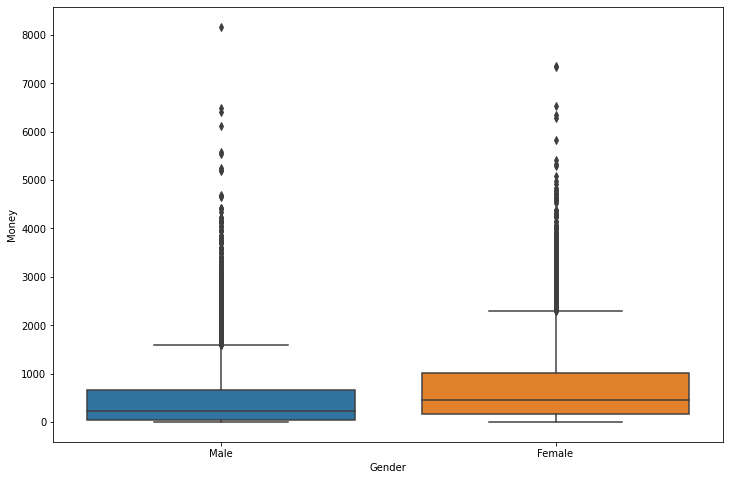

In [100]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Gender', y = 'Money', data = df)

From the conclusions of the previous exercises, did you expect the bloxplots to be like the ones above?

**Answer: I expected that the two boxes in the graphic Gender X Money would appear more distant from each other, and the graphic Gender X Height would appear less distant from each other.**

### Multivariate Analysis

Use `sns.pairplot` to see some combinations obtained so far. Use `hue = 'Gender`. 

Note that in a real problem, pairplot starts to get messy since there can be countless number of variables in a dataset. Use it wisely.

Usually people only plot this graph and don't take any conclusions from it. Don't fall into that trap. 

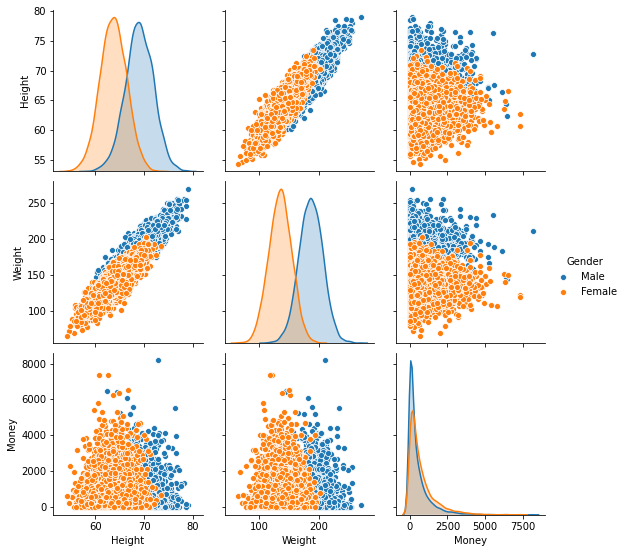

In [101]:
sns.pairplot(df, hue = 'Gender')

**Answer: The graphic 'HeightXHeight' and 'WeightXWeight' behaves as a normal distribution, but 'MoneyXMoney' behaves as Left skewed. The variables 'Height' and 'Weight' has a linear distribution and strong correlation with gender. In other hand, the variable 'Money' with 'Weight' or 'Height' does not have a linear distribution.**